<a href="https://colab.research.google.com/github/RohitJangid9983/Placement-prediction-dataset/blob/main/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PLACEMENT_PREDICTION_DATASET***

# ⭐***Install Librarys***

In [ ]:
!pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00


In [ ]:
!pip install -U imbalanced-learn

# ⭐***Import All Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import summarytools as st
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## ⚡***Upload dataset***


In [ ]:
df = pd.read_csv('/content/archive.zip')

In [ ]:
# check the top 5 values
df.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
# check the tail 5 values
df.tail()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


## ⚡***Number of rows and columns***

In [ ]:
df.shape

(10000, 12)

In [ ]:
# print the row number and columns number
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 10000
Number of Columns 12


## ⚡***Show The Columns Name***

In [ ]:
df.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

## ⚡***Overview The Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


## ⚡***Data Frame Summary***

In [ ]:
st.dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,StudentID[int64],Mean (sd) : 5000.5 (2886.9)min < med < max:1.0 < 5000.5 < 10000.0IQR (CV) : 4999.5 (1.7),"10,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAcZJREFUeJzt10FOwmAQQOH5GyUgpA0hwgG8AUsO4WE9BCdg4cYVOxLSlFAxGqwnACk16kvet22nM4sXElLTNCH9d9lfHyBd4ua7F1JKg4joXfn9LCI+r5ztOk/dTb276/x70zSHUw/PhppSGkwmk8c8z8dttx6Px9u6rh9Go9FLlmUfvzlP3U29+yfmd7tdmVJ6OhXrd7+ovTzPx4vF4lAUxVubxev1erxare7n8/nzbDYr28x2nafupt7ddb6qqv5yuRxvt9teRFwVakREFEXxNp1OX9ssL8tyEBExHA5bz3adp+6m3v0T8xExOPfQP1NCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCuHmkpeqquq3/fB+v+9HRNR13d9sNne/OU/dTb276/wlfX0BkpY55nO5980AAAAASUVORK5CYII="">",0(0.0%)
2,CGPA[float64],Mean (sd) : 7.7 (0.6)min < med < max:6.5 < 7.7 < 9.1IQR (CV) : 0.8 (12.0),27 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqFJREFUeJzt3TGO2kAUgOE3YSEGIhuEBB0tRaQUlBwih80RUnCAFTegQwJkhIODMU610Uba7ILHsztv9H+9wcUv2/M8AlNVlQC++/TRJwDc4uGjTwD/MsZ0RaRj8RHnqqpOTZ2PLwjVI8aY7mg0+h7H8bDuZxwOh70x5kdosRKqXzpxHA8Xi8UpSZL83oPTNI2Wy+Vwu912RIRQ4VaSJPl4PP5V8/BuoyfjCRZTUIFQoQKhQoVgn1EZ84QlyFAZ84QnyFCFMU9wQg1VRBjzhITFFFQgVKhAqFCBUKFC0IspG2VZtkUkNsbUOZwZbMMI9QVZlrWLovg2nU5brVbr7vEWM9jmvRmq5RselVeW8/n8EEVRbz6f55PJZH/Pscxg3Xg1VNs3PNqvLP1+v+4clhlsw966otZ+w8OVBU266RnV4g0PVxY0gsWUAxYTg/h6vbYdnJJ6hNowm4lBURRRWZZf8zz/KSJ19ygEiVAbZjMxWK/Xw9Vq1btcLi1X56cVoTpSZ2Kw3+95pv8PXqFCBUKFCoQKFQgVKhAqVGDVH5hQtycSakBC3p5IqAEJeXsioQYoxO2JLKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXYlIK/LPeyijjcz0qoEBH7vawibvezEipExG4vq4j7/axOQ/X5VoKXWexlFXG4n9VZqL7fSqCLs1B9v5VAF+fPqL7eSqALc1SoQKhQgVChAqFCBUKFCoQKFbx+hcq/i+CJt6Hy7yJ4zttQ+XcRPOdtqE/4dxGIsJiCEoQKFby/9UMPlz/LTqhohOufZb8p1DRNo3u/+Hg8RiIiWZZFm82m957Ha/1urectIrLb7b5EUdSbzWZmMBj8vufY0+n0+fHx8dW9x38AVqPBvABSpIwAAAAASUVORK5CYII="">",0(0.0%)
3,Internships[int64],1. 12. 23. 0,"5,542 (55.4%)2,475 (24.8%)1,983 (19.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZdJREFUeJzt20Fq22AUhdGnIkIzkTAGL8aL6GK7CO3GGGuQhEyUQQqF0mFy/x/pnBU8zIeNhO+wbVtBwo/WB3AcQ1U9V9VT60N26H3bttfWR/RkPJ/Pv6ZpOrU+ZG/Wdb0Pw/BbcH+N0zSdrtfr6zzPb62P2YvH4/FzWZbT7XZ7qiqx/TFWVc3z/Ha5XF5aH7Mzz60P6I0HBGLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEjFWf/79qfcie+Dz/b1zX9b4sy6n8/+pLret6r6r31nf0xAbh+9gg/GMw5SOl52823ww70+26yjppf7pcV1kn7VPP6ypPxzvjpS4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YrpcV/V2D1+j23WVddL+2CAQY11FjAcEYlr/jPqpPJCmUz5zvWNpNuUz1zue1lO+rl638L08IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjptmUz1zveJpO+cz1jsUGgRhTPmI+AEq8o0pjJAaiAAAAAElFTkSuQmCC"">",0(0.0%)
4,Projects[int64],1. 32. 13. 24. 0,"3,873 (38.7%)3,547 (35.5%)2,550 (25.5%)30 (0.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAe9JREFUeJzt28GJ22AUhdH3GzPJbCSMwSUkPbiIFJsiVER6MMZaZCazURbpIDBX8q9zKngDH9bI+LZlWQoSDmsfwH6IjZhWVa9V9bL2IUEfy7K8rX3EHh3P5/OPYRhOax+SMs/zvbX2U3B5x2EYTtfr9W0cx/e1j/lsj8fj6zRNp9vt9lJVYgs7VlWN4/h+uVx+r31MyOvaB+yVFwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI+ZY9e+nN2sfkrCXv3OrjvM836dpOtVOfnozz/O9qj7WvmOP/CycmGbKR4oXBGJ6f4x6ZG5I1+sqS6pt6XZdZUm1Pb2vq3bxdc6z8IJAjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhup3w9/k3Pruspn9nettggEGPKR8wzfLL5dOrE5tdVFlL92PS6ykKqL8+wruruLXmvfKlLjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhNr6u2ehf/Z/PrKgupftg

In [ ]:
#describe --> statistical measures of the data
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


## ⚡***Data Cleaning Step***

In [ ]:
# check missing values
df.isnull()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# check the missing values and sum
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
# check the duplicate values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
# check the duplicated values and sum
df.duplicated().sum()

0

In [ ]:
# check the placement status
df ['PlacementStatus']

,PlacementStatus
0,NotPlaced
1,Placed
2,NotPlaced
3,Placed
4,Placed
...,...
9995,NotPlaced
9996,Placed
9997,Placed
9998,Placed


In [ ]:
# check unique values in placementstatus columns
df ['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

In [ ]:
# check placementstatus in placed and Notplaced
df ['PlacementStatus'].value_counts()

,count
PlacementStatus,
NotPlaced,5803
Placed,4197


In [ ]:
# Data processing and user input clean data
df.columns = df.columns.str.strip()

# ⭐***Data visualization Steps***

## ⚡***Bar chart show***

<ipython-input-21-4ea0e7ad3463>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PlacementStatus', data=df, palette='pastel', ax=fig.axes[0])
<ipython-input-21-4ea0e7ad3463>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Placed', 'Not Placed'])
<ipython-input-21-4ea0e7ad3463>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PlacementTraining', data=df, palette='pastel', ax=fig.axes[1])
<ipython-input-21-4ea0e7ad3463>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklab

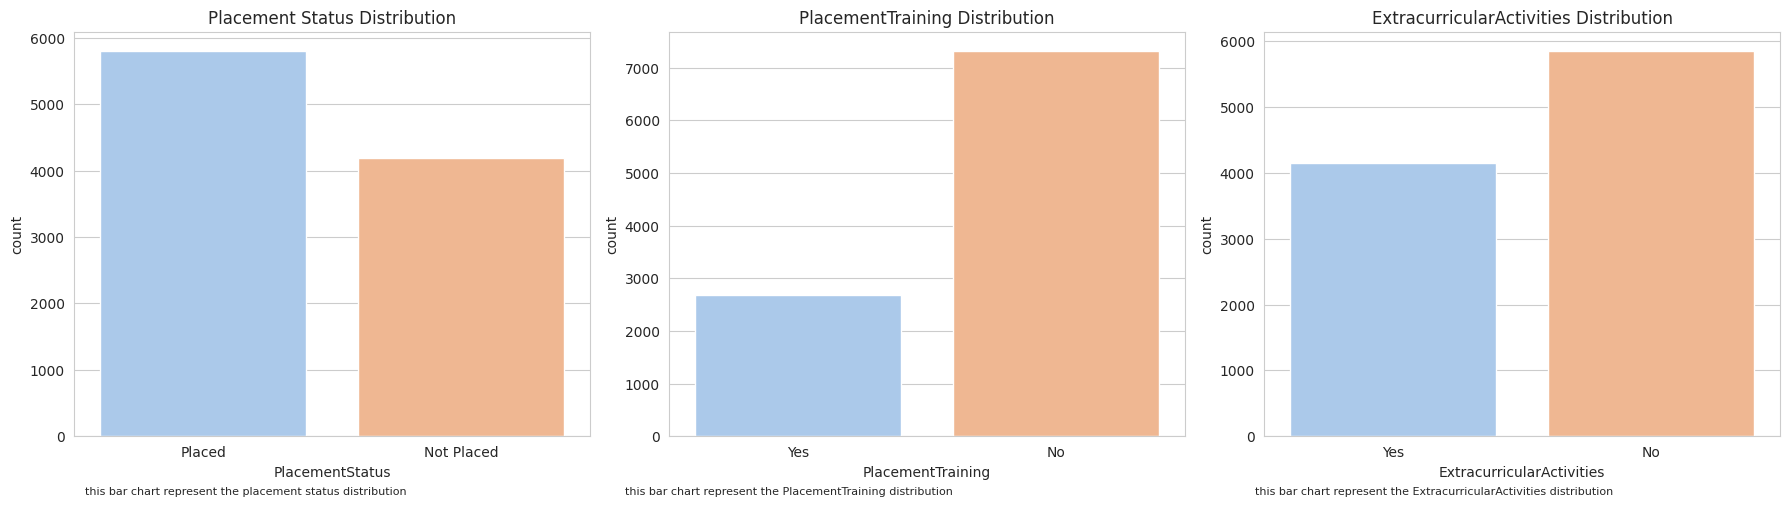

In [ ]:
# set seaborn style
sns.set_style("whitegrid")

# plot placementstatus and placementTraining Distribution
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.countplot(x='PlacementStatus', data=df, palette='pastel', ax=fig.axes[0])
axes[0].set_title('Placement Status Distribution')
axes[0].set_xticklabels(['Placed', 'Not Placed'])
plt.figtext(0.05,0.001,"this bar chart represent the placement status distribution",wrap=True,fontsize=8)

sns.countplot(x='PlacementTraining', data=df, palette='pastel', ax=fig.axes[1])
axes[1].set_title('PlacementTraining Distribution')
axes[1].set_xticklabels(['Yes','No'])
plt.figtext(0.35,0.001,"this bar chart represent the PlacementTraining distribution",wrap=True,fontsize=8)

sns.countplot(x='ExtracurricularActivities', data=df, palette='pastel', ax=fig.axes[2])
axes[2].set_title('ExtracurricularActivities Distribution')
axes[2].set_xticklabels(['Yes','No'])
plt.figtext(0.70,0.001,"this bar chart represent the ExtracurricularActivities distribution",wrap=True,fontsize=8)

plt.tight_layout()
plt.show()

## ⚡***Histogram plot show***

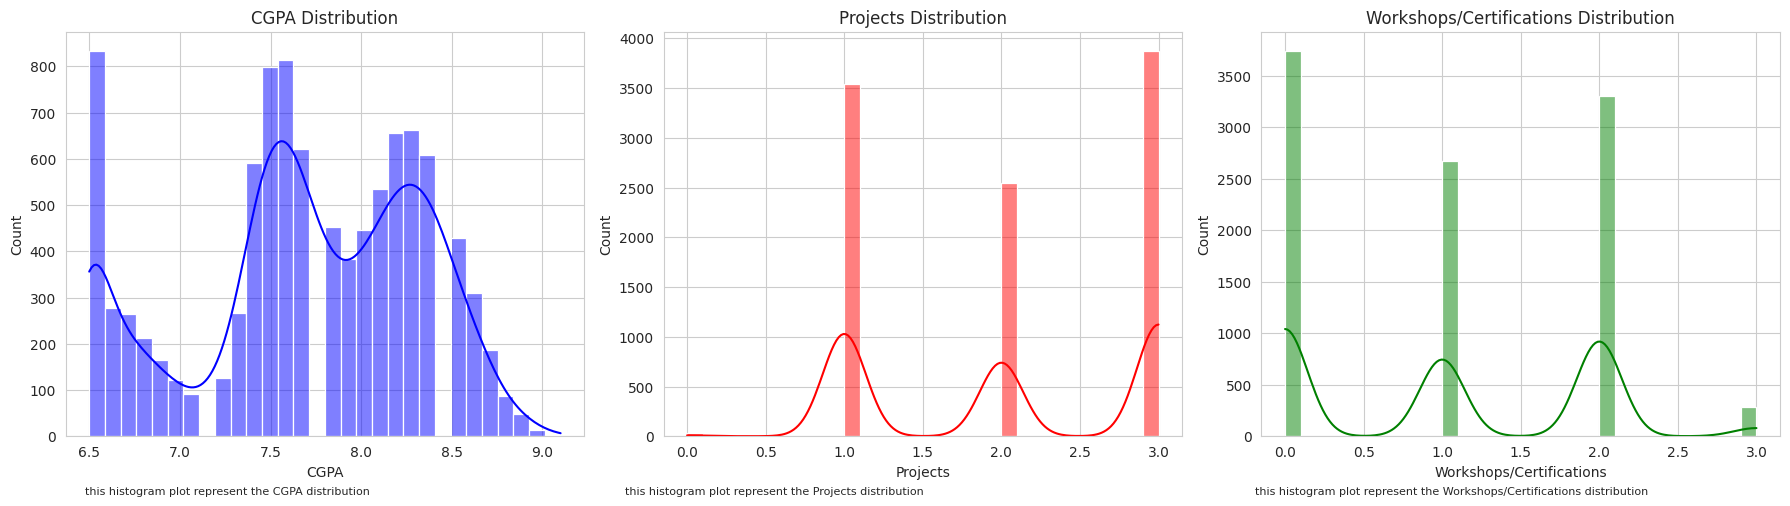

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["CGPA"] ,bins=30, kde=True, ax=axes[0],color="blue")
axes[0].set_title('CGPA Distribution')
plt.figtext(0.05,0.001,"this histogram plot represent the CGPA distribution",wrap=True,fontsize=8)

sns.histplot(df['Projects'], bins=30, kde=True, ax=axes[1],color="red")
axes[1].set_title('Projects Distribution')
plt.figtext(0.35,0.001,"this histogram plot represent the Projects distribution",wrap=True,fontsize=8)

sns.histplot(df['Workshops/Certifications'], bins=30, kde=True, ax=axes[2],color="green")
axes[2].set_title('Workshops/Certifications Distribution')
plt.figtext(0.70,0.001,"this histogram plot represent the Workshops/Certifications distribution",wrap=True,fontsize=8)

plt.tight_layout()
plt.show()

## ⚡***piechart show***

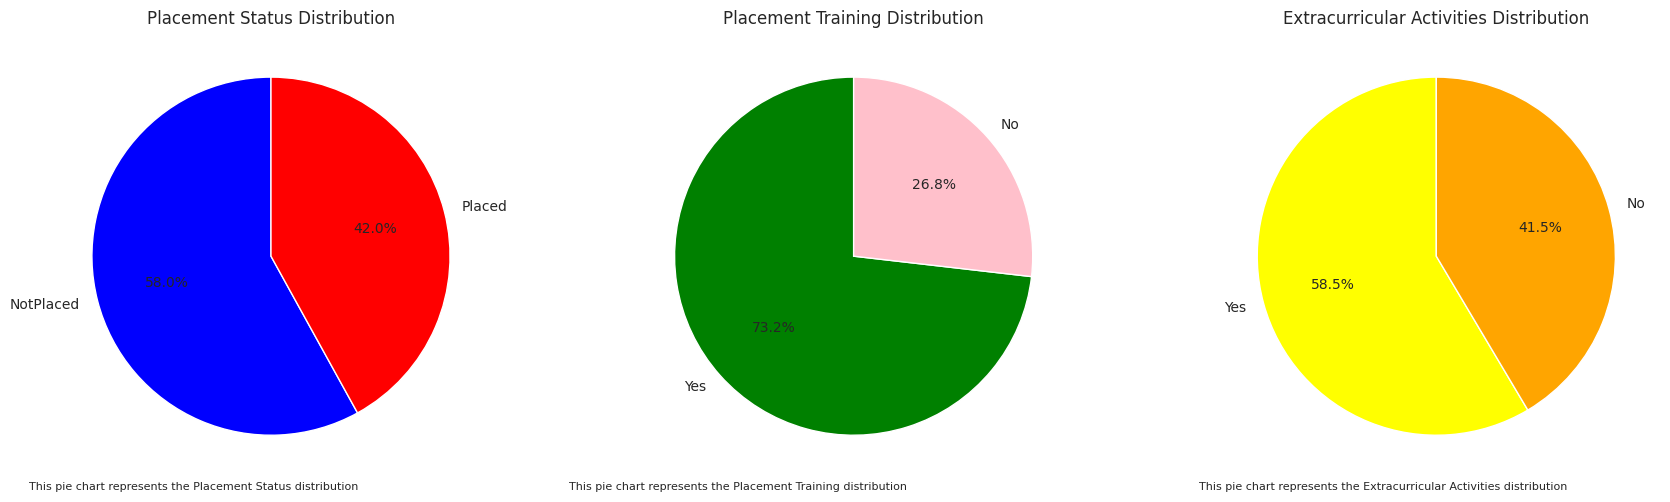

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Placement Status
axes[0].pie(df['PlacementStatus'].value_counts().values,
            labels=df['PlacementStatus'].value_counts().index,
            autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[0].set_title('Placement Status Distribution')

# Placement Training
axes[1].pie(df['PlacementTraining'].value_counts().values,
            labels=df['PlacementTraining'].value_counts().index,
            autopct='%1.1f%%', startangle=90, colors=['green', 'pink'])
axes[1].set_title('Placement Training Distribution')

# Extracurricular Activities
axes[2].pie(df['ExtracurricularActivities'].value_counts().values,
            labels=df['ExtracurricularActivities'].value_counts().index,
            autopct='%1.1f%%', startangle=90, colors=['yellow', 'orange'])
axes[2].set_title('Extracurricular Activities Distribution')

# Adding descriptive text
plt.figtext(0.05, 0.01, "This pie chart represents the Placement Status distribution", wrap=True, fontsize=8)
plt.figtext(0.35, 0.01, "This pie chart represents the Placement Training distribution", wrap=True, fontsize=8)
plt.figtext(0.70, 0.01, "This pie chart represents the Extracurricular Activities distribution", wrap=True, fontsize=8)

plt.tight_layout()
plt.show()


## ⚡***scatter plot show***

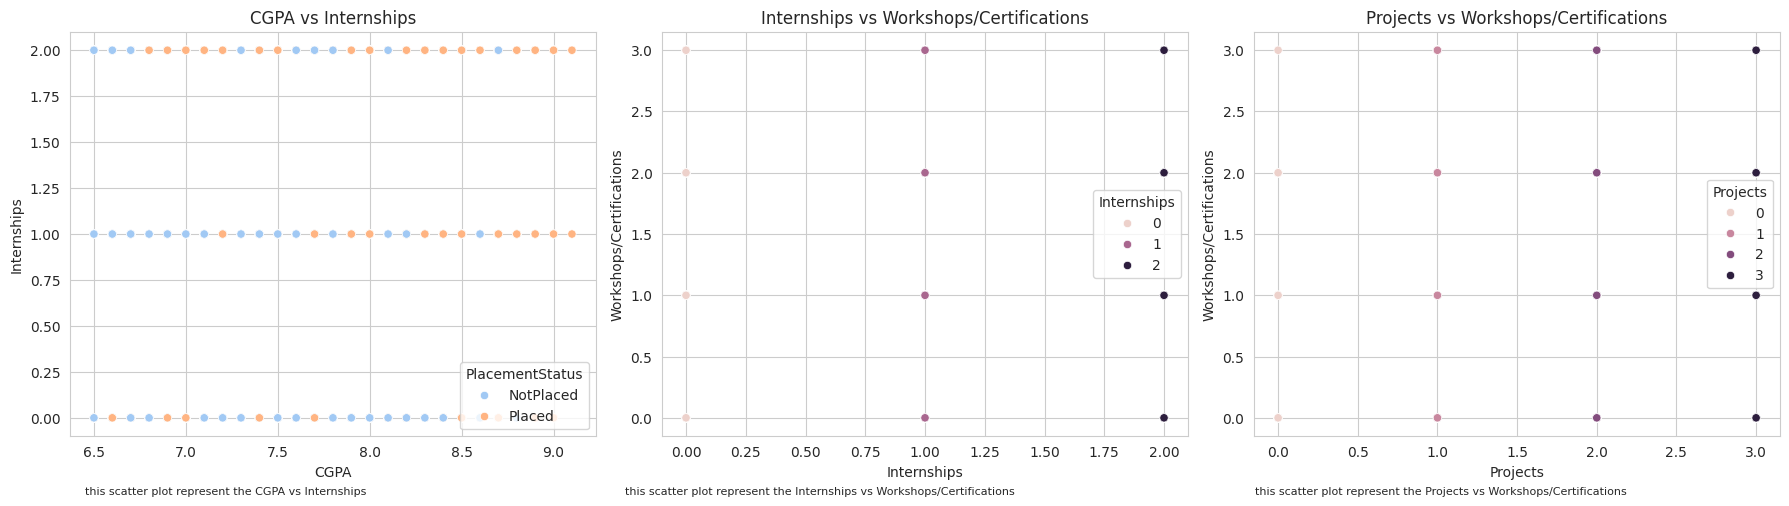

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='CGPA', y='Internships', data=df,hue=df["PlacementStatus"], palette="pastel", ax=axes[0], color='blue')
axes[0].set_title('CGPA vs Internships')
plt.figtext(0.05,0.001,"this scatter plot represent the CGPA vs Internships",wrap=True,fontsize=8)


sns.scatterplot(x='Internships', y='Workshops/Certifications', data=df,hue=df["Internships"],ax=axes[1], color='red')
axes[1].set_title('Internships vs Workshops/Certifications')
plt.figtext(0.35,0.001,"this scatter plot represent the Internships vs Workshops/Certifications",wrap=True,fontsize=8)

sns.scatterplot(x='Projects', y='Workshops/Certifications', data=df,hue=df["Projects"], ax=axes[2], color='green')
axes[2].set_title('Projects vs Workshops/Certifications')
plt.figtext(0.70,0.001,"this scatter plot represent the Projects vs Workshops/Certifications",wrap=True,fontsize=8)

plt.legend(title="Projects")
plt.tight_layout()
plt.show()

# ⭐***Outlier Detection & Handling***

## ⚡***Box plot show***

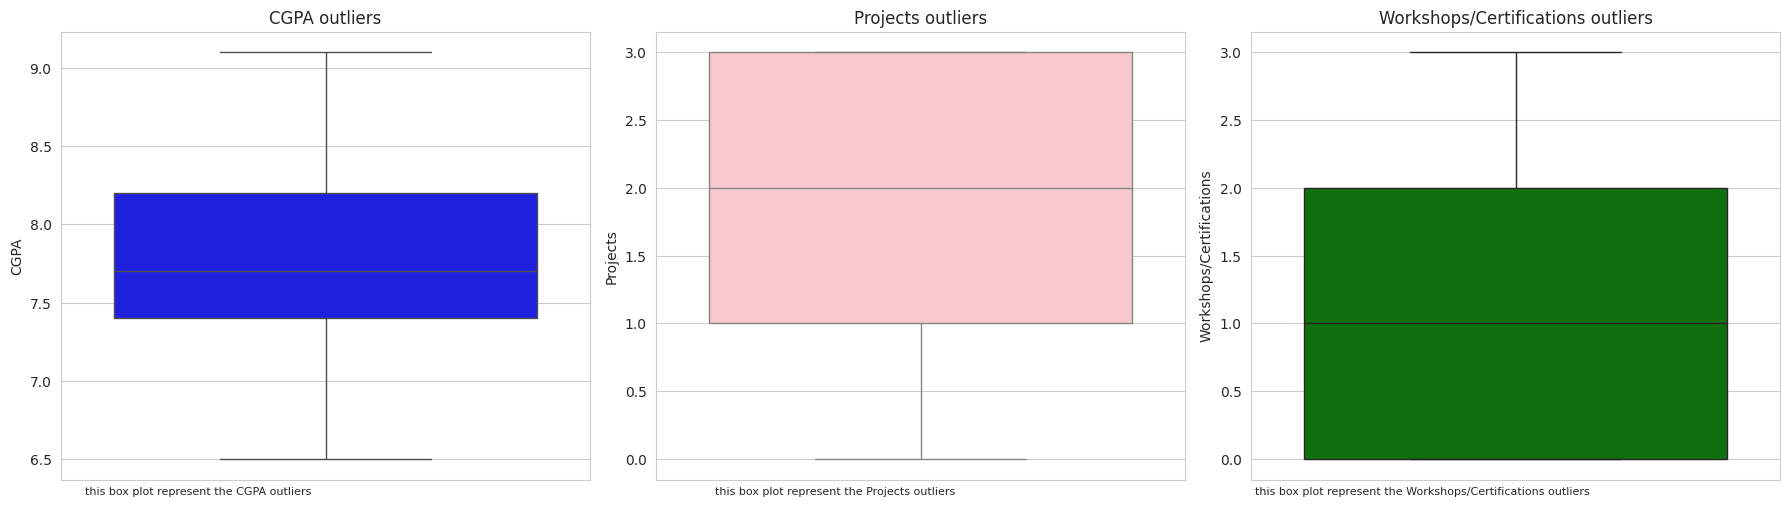

In [ ]:
# Boxplot for outlier Detection
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.boxplot(df['CGPA'], ax=axes[0], color='blue')
axes[0].set_title('CGPA outliers')
plt.figtext(0.05,0.001,"this box plot represent the CGPA outliers",wrap=True,fontsize=8)

sns.boxplot(df['Projects'], ax=axes[1], color='pink')
axes[1].set_title('Projects outliers')
plt.figtext(0.40,0.001,"this box plot represent the Projects outliers",wrap=True,fontsize=8)

sns.boxplot(df['Workshops/Certifications'], ax=axes[2], color='green')
axes[2].set_title('Workshops/Certifications outliers')
plt.figtext(0.70,0.001,"this box plot represent the Workshops/Certifications outliers",wrap=True,fontsize=8)

plt.tight_layout()
plt.show()


## ⚡Create a copy before cleaning

In [ ]:
df_cleaned = df.copy()  # Create a copy before cleaning

# ⭐***Feature Engineering & Encoding***

## ⚡***Encode categorical variables***

In [ ]:
labal_encoders = {}
for col in ['PlacementStatus', 'PlacementTraining', 'ExtracurricularActivities']:
    df_cleaned[col]=df_cleaned[col].fillna("unknown") # missing values remove
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    labal_encoders[col] = le # save Encoder for later reference

    print(df_cleaned.head())
    print(df_cleaned.dtypes)

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                No         61         79                0  
1               Yes         78         82 

## ⚡***Handling Missing Values***

In [ ]:
# Impute numerical features with mean
num_imputer = SimpleImputer(strategy='mean')
df_cleaned[['CGPA', 'Projects', 'Workshops/Certifications']] = num_imputer.fit_transform(df[['CGPA', 'Projects', 'Workshops/Certifications']])

# Impute categorical features with most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[['PlacementStatus', 'PlacementTraining', 'ExtracurricularActivities']] = cat_imputer.fit_transform(df[['PlacementStatus', 'PlacementTraining', 'ExtracurricularActivities']])


## ⚡***Encoding Categorical Variables***

In [ ]:
labal_encoder = LabelEncoder()
# Label Encoding for binary categories
df_cleaned['PlacementStatus'] = labal_encoder.fit_transform(df_cleaned['PlacementStatus'])

# One-Hot Encoding for multi-class categorical features
df_cleaned = pd.get_dummies(df_cleaned, columns=['PlacementTraining', 'ExtracurricularActivities'])


## ⚡***Scaling Numerical Features (Normalization or Standardization)***

In [ ]:
# Use MinMaxScaler() for Min-Max Scaling
scaler = StandardScaler()
df[["CGPA","Projects","Workshops/Certifications"]] = scaler.fit_transform(df[["CGPA","Projects","Workshops/Certifications"]])

## ⚡***Creating New Features (Feature Engineering)***

In [ ]:
# creating new features
df_cleaned['Total_Experience'] = df_cleaned['Internships'] + df_cleaned['Projects']
# Polynomial Feature
df_cleaned['CGPA_Squared'] = df_cleaned['CGPA'] ** 2

## ⚡***Correlation Heatmap (Only numerical features)***

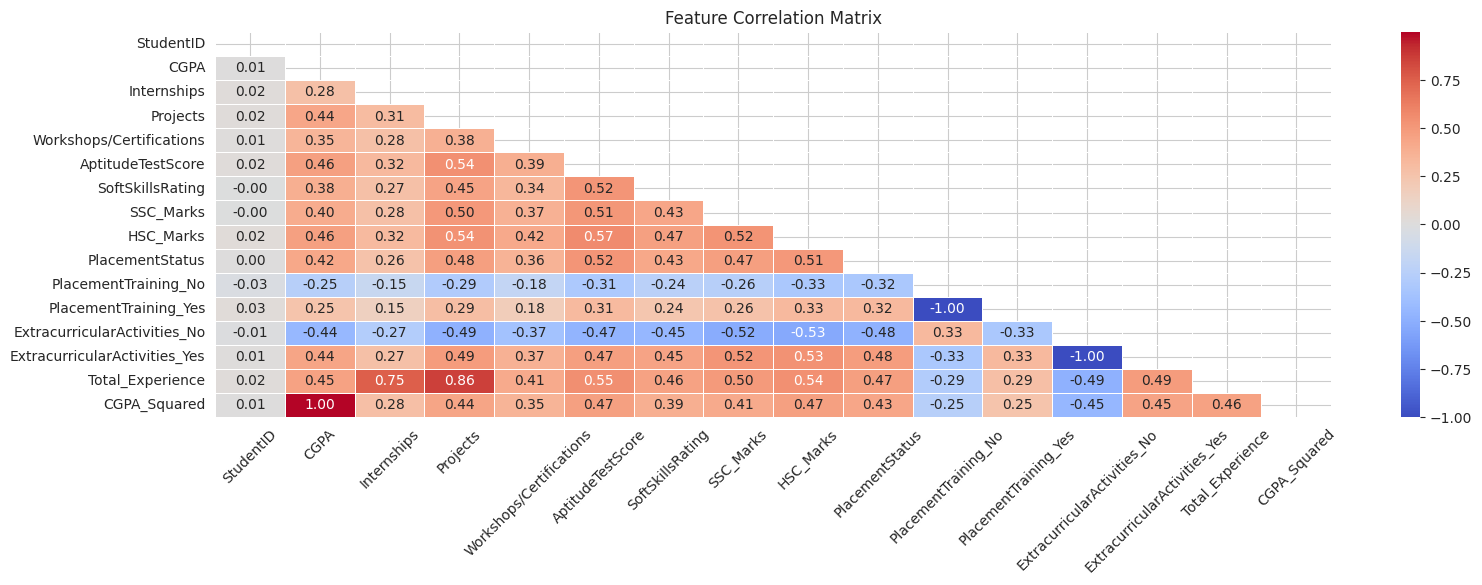

In [ ]:
# This step executed after encoding the  data and save it as 'df_cleaned"
# Correlation Heatmap (Only numerical features)
# Correlation matrix calculate karo
corr_matrix = df_cleaned.corr()

# Lower triangle mask create karo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)  # X-axis labels readable banane ke liye
plt.yticks(rotation=0)
plt.show()

# ⭐***Data Splitting***

In [ ]:
# Define features and target
X = df.drop(columns=['PlacementStatus'])
y = df['PlacementStatus']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert categorical features to numerical values ​​using LabelEncoder
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


# ⭐***Data Models***

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='Placed'),
        "Recall": recall_score(y_test, y_pred, pos_label='Placed'),
        "F1 Score": f1_score(y_test, y_pred, pos_label='Placed')
    }

# Display results
for model, metrics in results.items():
    print(f"{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Logistic Regression Performance:
  Accuracy: 0.7955
  Precision: 0.7287
  Recall: 0.8164
  F1 Score: 0.7701

Decision Tree Performance:
  Accuracy: 0.7240
  Precision: 0.6636
  Recall: 0.6937
  F1 Score: 0.6783

Random Forest Performance:
  Accuracy: 0.7955
  Precision: 0.7535
  Recall: 0.7616
  F1 Score: 0.7576

